In [ ]:
# bash in terminal
#pwd -> /home/clue/siva/drugbank
#unzip drugbank_all_full_database.xml.zip
#xmllint --noout --schema drugbank.xsd full\ database.xml


In [1]:
from google.colab import files
uploaded = files.upload()


KeyboardInterrupt: 

In [ ]:
!pip install lxml xmlschema

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.8/452.8 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.1/245.1 kB 20.4 MB/s eta 0:00:00


In [ ]:
import zipfile
import os

zip_path = 'drugbank_all_full_database.xml.zip'
extract_dir = 'extracted_drugbank'

if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(os.listdir(extract_dir))


['full database.xml']


In [ ]:
from lxml import etree

# Find the XML file in the extracted directory
xml_files = [f for f in os.listdir(extract_dir) if f.endswith('.xml')]
xml_path = os.path.join(extract_dir, xml_files[0])

ns = {'db': 'http://www.drugbank.ca'}
tree = etree.parse(xml_path)

rows = []
for drug in tree.xpath('//db:drug', namespaces=ns):
    drug_id = drug.findtext('db:drugbank-id', namespaces=ns)
    drug_name = drug.findtext('db:name', namespaces=ns)
    for polypeptide in drug.xpath('.//db:targets/db:target/db:polypeptide', namespaces=ns):
        protein = polypeptide.findtext('db:name', namespaces=ns)
        gene = polypeptide.findtext('db:gene-name', namespaces=ns)
        rows.append([drug_id, drug_name, protein, gene])

# Display the first 5 results
for row in rows[:5]:
    print(row)


['DB00001', 'Lepirudin', 'Prothrombin', 'F2']
['DB00002', 'Cetuximab', 'Epidermal growth factor receptor', 'EGFR']
['DB00002', 'Cetuximab', 'Low affinity immunoglobulin gamma Fc region receptor III-B', 'FCGR3B']
['DB00002', 'Cetuximab', 'Complement C1q subcomponent subunit A', 'C1QA']
['DB00002', 'Cetuximab', 'Complement C1q subcomponent subunit B', 'C1QB']


In [7]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

drugbank_full = pd.read_csv('drugbank_full_info.csv')

Saving drugbank_full_info.csv to drugbank_full_info.csv


In [8]:
drugbank_full.head()

,DrugBank ID,Drug Name,Description,Drug Group,Type,Category,Target Protein Name,Target Gene Name,Pharmacological Action,Actions,Detail
0,DB00001,Lepirudin,Lepirudin is a recombinant hirudin formed by 6...,approved;withdrawn,biotech,Target,Prothrombin,F2,NaN,inhibitor,P00734
1,DB00002,Cetuximab,Cetuximab is a recombinant chimeric human/mous...,approved,biotech,Target,Epidermal growth factor receptor,EGFR,NaN,binder,P00533
2,DB00002,Cetuximab,Cetuximab is a recombinant chimeric human/mous...,approved,biotech,Target,Low affinity immunoglobulin gamma Fc region re...,FCGR3B,NaN,binder,O75015
3,DB00002,Cetuximab,Cetuximab is a recombinant chimeric human/mous...,approved,biotech,Target,Complement C1q subcomponent subunit A,C1QA,NaN,binder,P02745
4,DB00002,Cetuximab,Cetuximab is a recombinant chimeric human/mous...,approved,biotech,Target,Complement C1q subcomponent subunit B,C1QB,NaN,binder,P02746


In [9]:
fourth_col = drugbank_full.columns[3]
approved_rows = drugbank_full[drugbank_full[fourth_col].astype(str).str.contains('approved', case=False, na=False)]
print(approved_rows.head())
print(approved_rows.shape)

fourth_col = drugbank_full.columns[3]
approved_rows_exact = drugbank_full[drugbank_full[fourth_col].astype(str).str.match('^approved$', case=False, na=False)]
print(approved_rows_exact.head())
print(approved_rows_exact.shape)


  DrugBank ID  Drug Name                                        Description  \
0     DB00001  Lepirudin  Lepirudin is a recombinant hirudin formed by 6...   
1     DB00002  Cetuximab  Cetuximab is a recombinant chimeric human/mous...   
2     DB00002  Cetuximab  Cetuximab is a recombinant chimeric human/mous...   
3     DB00002  Cetuximab  Cetuximab is a recombinant chimeric human/mous...   
4     DB00002  Cetuximab  Cetuximab is a recombinant chimeric human/mous...   

           Drug Group     Type Category  \
0  approved;withdrawn  biotech   Target   
1            approved  biotech   Target   
2            approved  biotech   Target   
3            approved  biotech   Target   
4            approved  biotech   Target   

                                 Target Protein Name Target Gene Name  \
0                                        Prothrombin               F2   
1                   Epidermal growth factor receptor             EGFR   
2  Low affinity immunoglobulin gamma Fc region 

In [10]:
sixth_column = approved_rows_exact.columns[5]
target_rows = approved_rows_exact[approved_rows_exact[sixth_column].astype(str).str.contains('Target', case=False, na=False)]
print(target_rows.head())
print(target_rows.shape)

  DrugBank ID  Drug Name                                        Description  \
1     DB00002  Cetuximab  Cetuximab is a recombinant chimeric human/mous...   
2     DB00002  Cetuximab  Cetuximab is a recombinant chimeric human/mous...   
3     DB00002  Cetuximab  Cetuximab is a recombinant chimeric human/mous...   
4     DB00002  Cetuximab  Cetuximab is a recombinant chimeric human/mous...   
5     DB00002  Cetuximab  Cetuximab is a recombinant chimeric human/mous...   

  Drug Group     Type Category  \
1   approved  biotech   Target   
2   approved  biotech   Target   
3   approved  biotech   Target   
4   approved  biotech   Target   
5   approved  biotech   Target   

                                 Target Protein Name Target Gene Name  \
1                   Epidermal growth factor receptor             EGFR   
2  Low affinity immunoglobulin gamma Fc region re...           FCGR3B   
3              Complement C1q subcomponent subunit A             C1QA   
4              Complement C1

In [11]:
target_rows_subset = target_rows.iloc[:, [0, 1, 6, 7]]
print(target_rows_subset)

      DrugBank ID        Drug Name  \
1         DB00002        Cetuximab   
2         DB00002        Cetuximab   
3         DB00002        Cetuximab   
4         DB00002        Cetuximab   
5         DB00002        Cetuximab   
...           ...              ...   
32573     DB19353  Benzgalantamine   
32574     DB19353  Benzgalantamine   
32575     DB19353  Benzgalantamine   
32576     DB19353  Benzgalantamine   
32581     DB19378        Megestrol   

                                     Target Protein Name Target Gene Name  
1                       Epidermal growth factor receptor             EGFR  
2      Low affinity immunoglobulin gamma Fc region re...           FCGR3B  
3                  Complement C1q subcomponent subunit A             C1QA  
4                  Complement C1q subcomponent subunit B             C1QB  
5                  Complement C1q subcomponent subunit C             C1QC  
...                                                  ...              ...  
32573      

In [12]:
fourth_col_name = target_rows_subset.columns[3]
target_gene_list = target_rows_subset[fourth_col_name].tolist()
print(target_gene_list)

['EGFR', 'FCGR3B', 'C1QA', 'C1QB', 'C1QC', 'FCGR3A', 'FCGR1A', 'FCGR2A', 'DNASE1', 'LHCGR', 'GNRH1', 'GNRHR', 'EPOR', 'CSF3R', 'IFNAR1', 'IFNAR2', 'folP', 'PLG', 'FGA', 'SERPINE1', 'PLG', 'FSHR', 'LHCGR', 'OXTR', 'AVPR2', 'AVPR1A', 'AVPR1B', 'F10', 'F3', 'FGFR2', 'FGFR1', 'HSPG2', 'GCGR', 'GLP2R', 'GLP1R', 'IL2RB', 'IL2RA', 'IL2RG', 'LHCGR', 'INSR', 'IGF1R', 'INSR', 'IGF1R', nan, 'ITGB3', 'ITGA2B', 'FCGR2A', 'FCGR2B', 'VTN', 'ELANE', nan, 'GRB2', nan, 'TNF', 'FSHR', 'AVPR2', 'AVPR1A', 'AVPR1B', 'OXTR', 'IFNAR1', 'IFNAR2', 'INSR', 'IGF1R', 'MS4A1', nan, 'GHR', 'FOLH1', nan, 'FSHR', 'LHCGR', 'MR1', 'ITGAL', 'CD86', 'FCGR2B', 'CD4', 'ITGB1', 'ITGAV', 'ITGB3', 'CD1A', 'CSF3R', 'IFNAR2', 'IFNA2', 'IFNAR1', 'HMGCR', 'HDAC2', 'ACE', 'BDKRB1', 'GABBR2', 'CXCR4', 'GABBR1', 'CCKBR', 'CHRNA4', 'CHRNA7', 'CHRNB2', 'CHRNA2', 'CHRNA3', 'CHRNA5', 'CHRNA6', 'CHRNA9', 'CHRNA10', 'CHRNB3', 'CHRNB4', 'CYP19A1', 'CHAT', 'CHRM3', 'CHRM1', 'TSPO', 'GABRA1', 'GABRA1', 'DDC', 'SCN5A', nan, 'NEU1', 'NEU2', 'MT

In [13]:
filtered_genes = [
    str(gene).strip()  # Convert to string and strip whitespace
    for gene in target_gene_list
    if isinstance(gene, (str, float))  # Allow str and float (to handle NaN)
    and (str(gene).strip() != '' if isinstance(gene, str) else not pd.isna(gene))
]
unique_genes = sorted(set(filtered_genes))
print(unique_genes)
print(len(unique_genes))


['A2M', 'ABAT', 'ABCA1', 'ABCB1', 'ABCB11', 'ABCC1', 'ABCC2', 'ABCC8', 'ABCC9', 'ABCG2', 'ABL1', 'ACACB', 'ACAD8', 'ACADM', 'ACADS', 'ACAT1', 'ACE', 'ACE2', 'ACHE', 'ACOX1', 'ADA', 'ADCY1', 'ADH1C', 'ADH7', 'ADORA1', 'ADORA2A', 'ADORA2B', 'ADORA3', 'ADRA1A', 'ADRA1B', 'ADRA1D', 'ADRA2A', 'ADRA2B', 'ADRA2C', 'ADRB1', 'ADRB2', 'ADRB3', 'AGTR1', 'AHR', 'AHSP', 'AIFM1', 'AKR1C2', 'AKR1C3', 'AKR1D1', 'ALAD', 'ALB', 'ALDH2', 'ALDH3A2', 'ALK', 'ALOX5', 'AMD1', 'AMN', 'ANO1', 'ANPEP', 'ANXA1', 'AOC1', 'AOC3', 'AOX1', 'APP', 'AQP3', 'AR', 'ASGR2', 'ASIC1', 'ASIC2', 'ATF1', 'ATIC', 'ATM', 'ATOX1', 'ATP1A1', 'ATP1A2', 'ATP1A3', 'ATP1B1', 'ATP1B2', 'ATP1B3', 'ATP2C1', 'ATP4A', 'ATP4B', 'ATP5F1A', 'ATP5F1D', 'ATP6V1A', 'ATP6V1C1', 'AVPR1A', 'AVPR1B', 'AVPR2', 'AZIN2', 'BCHE', 'BCL2', 'BCR', 'BDKRB1', 'BRAF', 'BTK', 'C1QA', 'C1QB', 'C1QC', 'C1R', 'C1S', 'C3', 'C5', 'CA1', 'CA12', 'CA14', 'CA2', 'CA3', 'CA4', 'CA5A', 'CA7', 'CA9', 'CACNA1A', 'CACNA1B', 'CACNA1C', 'CACNA1D', 'CACNA1E', 'CACNA1F', 'CAC

In [2]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

HBP_full = pd.read_csv('proteins_all_regions_HBP.csv')

Saving proteins_all_regions_HBP.csv to proteins_all_regions_HBP.csv


In [3]:
HBP_full_subset = HBP_full.iloc[:, [0, 36]]
print(HBP_full_subset)

      Gene Symbol    Classification
0             A2M  Expressed in all
1            AAK1  Expressed in all
2            AARS  Expressed in all
3           AARS2  Expressed in all
4        AASDHPPT  Expressed in all
...           ...               ...
12101      ZSWIM3   Region enriched
12102      ZYG11A   Region enriched
12103        ZZZ3   Region enriched
12104         NaN               NaN
12105          ND               NaN

[12106 rows x 2 columns]


In [4]:
HBP_full_subset_0_col = HBP_full_subset.columns[0]
HBP_genes = HBP_full_subset[HBP_full_subset_0_col].tolist()
print(HBP_genes)

['A2M', 'AAK1', 'AARS', 'AARS2', 'AASDHPPT', 'ABAT', 'ABCA2', 'ABCA8', 'ABCD3', 'ABCE1', 'ABCF1', 'ABCF3', 'ABHD10', 'ABHD11', 'ABHD12', 'ABHD14B', 'ABHD16A', 'ABHD17B', 'ABI1', 'ABI2', 'ABLIM1', 'ABLIM2', 'ABR', 'ACAA1', 'ACAA2', 'ACACA', 'ACAD8', 'ACAD9', 'ACADM', 'ACADS', 'ACADSB', 'ACADVL', 'ACAN', 'ACAT1', 'ACAT2', 'ACBD3', 'ACBD5', 'ACBD7', 'ACLY', 'ACO1', 'ACO2', 'ACOT1', 'ACOT13', 'ACOT7', 'ACOT9', 'ACP1', 'ACSBG1', 'ACSF2', 'ACSF3', 'ACSL1', 'ACSL3', 'ACSL6', 'ACSS1', 'ACSS3', 'ACTB', 'ACTBL2', 'ACTG1', 'ACTN1', 'ACTN4', 'ACTR10', 'ACTR1A', 'ACTR1B', 'ACTR2', 'ACTR3', 'ACTR3B', 'ACYP1', 'ACYP2', 'ADAM10', 'ADAM22', 'ADAM23', 'ADAR', 'ADCK3', 'ADCY5', 'ADD1', 'ADD2', 'ADD3', 'ADGRL1', 'ADH5', 'ADO', 'ADPRHL2', 'ADRBK1', 'ADRM1', 'ADSL', 'ADSS', 'AFG3L2', 'AGAP1', 'AGAP3', 'AGFG1', 'AGK', 'AGL', 'AGPAT3', 'AGPS', 'AGRN', 'AGT', 'AHCY', 'AHCYL1', 'AHCYL2', 'AHNAK', 'AHNAK2', 'AHSA1', 'AIDA', 'AIFM1', 'AIMP1', 'AIMP2', 'AIP', 'AK1', 'AK2', 'AK3', 'AK4', 'AK5', 'AKAP12', 'AKR1A1', 

In [5]:
filtered_genes_HBP = [
    str(gene).strip()  # Convert to string and strip whitespace
    for gene in HBP_genes
    if isinstance(gene, (str, float))  # Allow str and float (to handle NaN)
    and (str(gene).strip() != '' if isinstance(gene, str) else not pd.isna(gene))
]
HBP_genes_unique = sorted(set(filtered_genes_HBP))
print(HBP_genes_unique)
print(len(HBP_genes_unique))

['A1BG', 'A1CF', 'A2M', 'A2ML1', 'AAAS', 'AACS', 'AADAT', 'AAGAB', 'AAK1', 'AAMDC', 'AAMP', 'AAR2', 'AARS', 'AARS2', 'AASDHPPT', 'AASS', 'AATF', 'AATK', 'ABAT', 'ABCA1', 'ABCA10', 'ABCA12', 'ABCA13', 'ABCA2', 'ABCA3', 'ABCA4', 'ABCA5', 'ABCA6', 'ABCA7', 'ABCA8', 'ABCA9', 'ABCB1', 'ABCB10', 'ABCB11', 'ABCB6', 'ABCB7', 'ABCB8', 'ABCB9', 'ABCC1', 'ABCC12', 'ABCC3', 'ABCC4', 'ABCC5', 'ABCC6', 'ABCC8', 'ABCC9', 'ABCD1', 'ABCD2', 'ABCD3', 'ABCD4', 'ABCE1', 'ABCF1', 'ABCF2', 'ABCF3', 'ABCG1', 'ABCG2', 'ABCG4', 'ABHD1', 'ABHD10', 'ABHD11', 'ABHD12', 'ABHD13', 'ABHD14A-ACY1', 'ABHD14B', 'ABHD15', 'ABHD16A', 'ABHD17A', 'ABHD17B', 'ABHD17C', 'ABHD3', 'ABHD4', 'ABHD5', 'ABHD6', 'ABHD8', 'ABI1', 'ABI2', 'ABI3', 'ABI3BP', 'ABL1', 'ABL2', 'ABLIM1', 'ABLIM2', 'ABLIM3', 'ABR', 'ABRACL', 'ABTB1', 'ABTB2', 'ACAA1', 'ACAA2', 'ACACA', 'ACACB', 'ACAD10', 'ACAD11', 'ACAD8', 'ACAD9', 'ACADL', 'ACADM', 'ACADS', 'ACADSB', 'ACADVL', 'ACAN', 'ACAP1', 'ACAP2', 'ACAP3', 'ACAT1', 'ACAT2', 'ACBD3', 'ACBD5', 'ACBD6', 

In [14]:
common_genes = list(set(HBP_genes_unique).intersection(set(unique_genes)))
common_genes_sorted = sorted(common_genes)
print(common_genes_sorted)
print(len(common_genes_sorted))

['A2M', 'ABAT', 'ABCA1', 'ABCB1', 'ABCB11', 'ABCC1', 'ABCC8', 'ABCC9', 'ABCG2', 'ABL1', 'ACACB', 'ACAD8', 'ACADM', 'ACADS', 'ACAT1', 'ACE', 'ACE2', 'ACHE', 'ACOX1', 'ADA', 'ADCY1', 'ADH7', 'ADORA1', 'ADORA2A', 'ADRA1B', 'ADRA2A', 'ADRB1', 'ADRB2', 'AHR', 'AHSP', 'AIFM1', 'AKR1C2', 'AKR1C3', 'ALAD', 'ALB', 'ALDH2', 'ALDH3A2', 'ALK', 'ALOX5', 'AMD1', 'ANPEP', 'ANXA1', 'AOC1', 'AOC3', 'AOX1', 'APP', 'ASIC1', 'ASIC2', 'ATF1', 'ATIC', 'ATM', 'ATOX1', 'ATP1A1', 'ATP1A2', 'ATP1A3', 'ATP1B1', 'ATP1B2', 'ATP1B3', 'ATP2C1', 'ATP4A', 'ATP6V1A', 'ATP6V1C1', 'AVPR1B', 'AVPR2', 'BCHE', 'BCL2', 'BCR', 'BRAF', 'BTK', 'C1QA', 'C1QB', 'C1QC', 'C1R', 'C1S', 'C3', 'C5', 'CA1', 'CA12', 'CA14', 'CA2', 'CA3', 'CA4', 'CA7', 'CACNA1A', 'CACNA1B', 'CACNA1C', 'CACNA1D', 'CACNA1E', 'CACNA1G', 'CACNA1H', 'CACNA1I', 'CACNA1S', 'CACNA2D1', 'CACNA2D3', 'CACNB1', 'CACNB2', 'CACNB3', 'CACNB4', 'CACNG1', 'CACNG2', 'CADPS', 'CADPS2', 'CALB2', 'CALM2', 'CALR', 'CALY', 'CAMK2G', 'CANX', 'CAPS', 'CASP3', 'CASP9', 'CASQ1', '

In [15]:
filtered_df = HBP_full_subset[HBP_full_subset["Gene Symbol"].isin(common_genes_sorted)]
classification_counts = filtered_df["Classification"].value_counts(dropna=False)
classification_counts_dict = classification_counts.to_dict()

print(classification_counts_dict)


{'Expressed in all': 168, 'Region enhanced': 132, 'Region enriched': 116, 'Group enriched': 105, 'Mixed': 87}


In [16]:
Proteins_in_classification = filtered_df.groupby('Classification')['Gene Symbol'].apply(list).to_dict()
print(Proteins_in_classification)

{'Expressed in all': ['A2M', 'ABAT', 'ACAD8', 'ACADM', 'ACADS', 'ACAT1', 'AIFM1', 'AKR1C3', 'ALAD', 'ALB', 'ALDH2', 'ALDH3A2', 'APP', 'ATIC', 'ATP1A1', 'ATP1A2', 'ATP1A3', 'ATP1B1', 'ATP1B2', 'ATP1B3', 'ATP6V1A', 'ATP6V1C1', 'BCR', 'BRAF', 'C3', 'CA2', 'CACNA2D1', 'CACNB1', 'CADPS', 'CALB2', 'CALM2', 'CALR', 'CAMK2G', 'CANX', 'CAT', 'CD38', 'CHP1', 'CMPK1', 'COX4I1', 'COX5A', 'COX5B', 'COX6B1', 'COX6C', 'CP', 'CPNE1', 'CPT1A', 'CRYZ', 'CYB5A', 'CYB5R1', 'CYB5R3', 'DDAH1', 'DLD', 'DLG4', 'DMD', 'DPYSL2', 'ETFDH', 'FABP5', 'FDPS', 'FDXR', 'FECH', 'FGB', 'FGF1', 'FGG', 'FN1', 'FOLH1', 'FTH1', 'FTL', 'FXN', 'GAA', 'GAMT', 'GANAB', 'GCA', 'GCDH', 'GOT1', 'GPD1', 'GRB2', 'GRIA2', 'GSK3B', 'GSR', 'GSTP1', 'GUCY1A2', 'HBA1', 'HBB', 'HLA-A', 'HLA-B', 'HPRT1', 'HSP90AA1', 'HSPA5', 'HSPG2', 'IMPA1', 'IMPDH2', 'ITGAV', 'ITGB1', 'IVD', 'KRT2', 'L1CAM', 'LDHA', 'LDHB', 'LIPE', 'LMAN1', 'LRP1', 'LTA4H', 'MAOA', 'MAOB', 'MAP2K1', 'MAP2K2', 'MTOR', 'NCS1', 'NDUFA9', 'NQO2', 'NT5E', 'NTRK2', 'NUCB1', 'O

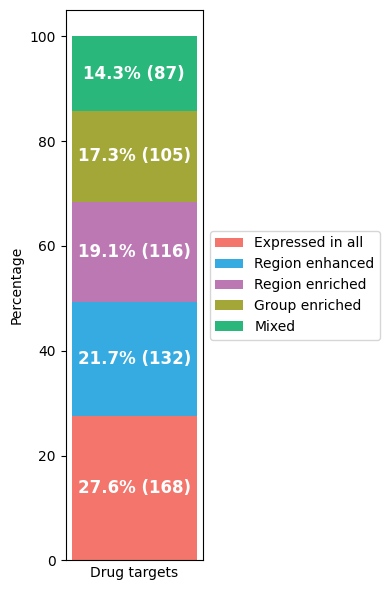

In [20]:
import matplotlib.pyplot as plt
import numpy as np

classification_counts = {
    'Expressed in all': 168,
    'Region enhanced': 132,
    'Region enriched': 116,
    'Group enriched': 105,
    'Mixed': 87
}
colors = {
    'Expressed in all': '#f3756c',
    'Mixed': '#29b77c',
    'Group enriched': '#a2a738',
    'Region enhanced': '#35abe1',
    'Region enriched': '#bb78b3'
}

labels = list(classification_counts.keys())
values = list(classification_counts.values())
color_list = [colors[label] for label in labels]
total = sum(values)

# Plot single stacked bar as percentages
fig, ax = plt.subplots(figsize=(4, 6))
bottom = 0
for i in range(len(values)):
    height = values[i] / total * 100  # Convert count to percentage
    ax.bar('Drug targets', height, bottom=bottom, color=color_list[i], label=labels[i])
    # Add percentage label in the middle of each segment
    ax.text(0, bottom + height / 2, f'{height:.1f}% ({values[i]})', ha='center', va='center', color='white', fontsize=12, fontweight='bold')
    bottom += height

ax.set_ylabel('Percentage')
ax.set_xlabel('Drug targets')
ax.set_title('')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xticks([])  # Hide x-axis ticks since only one bar
plt.tight_layout()
plt.show()

In [21]:
from google.colab import files
uploaded = files.upload()

cerebellum_df = pd.read_csv('cerebellum_DP.csv')
hippocampus_df = pd.read_csv('Hippocampus_DP.csv')
thalamus_df = pd.read_csv('Thallamus_DP.csv')
dpfc_df = pd.read_csv('DPFC_DP.csv')

# Drop the 'AdjustedPvalue' column as requested
cerebellum_df = cerebellum_df.drop('AdjustedPvalue', axis=1, errors='ignore')
hippocampus_df = hippocampus_df.drop('AdjustedPvalue', axis=1, errors='ignore')
thalamus_df = thalamus_df.drop('AdjustedPvalue', axis=1, errors='ignore')
dpfc_df = dpfc_df.drop('AdjustedPvalue', axis=1, errors='ignore')

Saving Thallamus_DP.csv to Thallamus_DP.csv
Saving cerebellum_DP.csv to cerebellum_DP.csv
Saving DPFC_DP.csv to DPFC_DP.csv
Saving Hippocampus_DP.csv to Hippocampus_DP.csv


In [22]:
import pandas as pd

cerebellum_genes = cerebellum_df['Gene'].dropna().unique().tolist()
hippocampus_genes = hippocampus_df['Gene'].dropna().unique().tolist()
thalamus_genes = thalamus_df['Gene'].dropna().unique().tolist()
dpfc_genes = dpfc_df['Gene'].dropna().unique().tolist()

combined_genes = cerebellum_genes + hippocampus_genes + thalamus_genes + dpfc_genes
genes_list_DBP = sorted(set(combined_genes))

print(f"Total unique genes: {len(genes_list_DBP)}")
print("First 10 genes:", genes_list_DBP[:10])
print(genes_list_DBP)

Total unique genes: 6506
First 10 genes: ['43891', '43892', '43895', '44076', '44077', '44078', '44079', '44080', '44081', '44082']
['43891', '43892', '43895', '44076', '44077', '44078', '44079', '44080', '44081', '44082', '44083', '44084', '44085', '44089', 'A2M', 'AACS', 'AAGAB', 'AAK1', 'AAMDC', 'AAMP', 'AAR2', 'AARS', 'AARS2', 'AASDHPPT', 'AASS', 'AATK', 'ABAT', 'ABCA1', 'ABCA2', 'ABCA3', 'ABCA8', 'ABCB1', 'ABCB10', 'ABCB4', 'ABCB6', 'ABCB7', 'ABCB8', 'ABCC6', 'ABCD1', 'ABCD2', 'ABCD3', 'ABCE1', 'ABCF1', 'ABCF2', 'ABCF3', 'ABCG1', 'ABCG2', 'ABHD10', 'ABHD11', 'ABHD12', 'ABHD14A-ACY1', 'ABHD14B', 'ABHD16A', 'ABHD17B', 'ABHD17C', 'ABHD6', 'ABI1', 'ABI2', 'ABL1', 'ABL2', 'ABLIM1', 'ABLIM2', 'ABLIM3', 'ABR', 'ACAA1', 'ACAA2', 'ACACA', 'ACAD10', 'ACAD11', 'ACAD8', 'ACAD9', 'ACADM', 'ACADS', 'ACADSB', 'ACADVL', 'ACAN', 'ACAP2', 'ACAP3', 'ACAT1', 'ACAT2', 'ACBD3', 'ACBD5', 'ACBD6', 'ACBD7', 'ACE', 'ACHE', 'ACIN1', 'ACLY', 'ACO1', 'ACO2', 'ACOT1', 'ACOT11', 'ACOT13', 'ACOT2', 'ACOT7', 'ACO

In [26]:
common_genes_DBP = list(set(genes_list_DBP).intersection(set(unique_genes)))
common_genes_sorted_DBP = sorted(common_genes_DBP)
print(common_genes_sorted_DBP)
print(len(common_genes_sorted_DBP))

['A2M', 'ABAT', 'ABCA1', 'ABCB1', 'ABCG2', 'ABL1', 'ACAD8', 'ACADM', 'ACADS', 'ACAT1', 'ACE', 'ACHE', 'ACOX1', 'ADA', 'ADCY1', 'ADORA1', 'ADRA2A', 'AHSP', 'AIFM1', 'AKR1C2', 'AKR1C3', 'ALAD', 'ALB', 'ALDH2', 'ALDH3A2', 'ANXA1', 'AOC3', 'APP', 'ATIC', 'ATM', 'ATOX1', 'ATP1A1', 'ATP1A2', 'ATP1A3', 'ATP1B1', 'ATP1B2', 'ATP1B3', 'ATP2C1', 'ATP6V1A', 'ATP6V1C1', 'BCR', 'BRAF', 'C1QB', 'C1QC', 'C1S', 'C3', 'CA1', 'CA12', 'CA14', 'CA2', 'CA4', 'CA7', 'CACNA1A', 'CACNA1B', 'CACNA1C', 'CACNA1D', 'CACNA1E', 'CACNA1G', 'CACNA1S', 'CACNA2D1', 'CACNA2D3', 'CACNB1', 'CACNB2', 'CACNB3', 'CACNB4', 'CACNG2', 'CADPS', 'CADPS2', 'CALB2', 'CALM2', 'CALR', 'CAMK2G', 'CANX', 'CAPS', 'CASP3', 'CAT', 'CD38', 'CD80', 'CES1', 'CHP1', 'CHRM1', 'CHRM3', 'CIB1', 'CMPK1', 'COX4I1', 'COX5A', 'COX5B', 'COX6B1', 'COX6C', 'COX7B', 'COX7C', 'COX8A', 'CP', 'CPNE1', 'CPT1A', 'CRBN', 'CRYZ', 'CXCR4', 'CYB5A', 'CYB5R1', 'CYB5R3', 'CYP51A1', 'DAO', 'DDAH1', 'DDR1', 'DHODH', 'DLD', 'DLG4', 'DMD', 'DNMT1', 'DPYSL2', 'EDNRB', '

In [24]:
!pip install venny4py

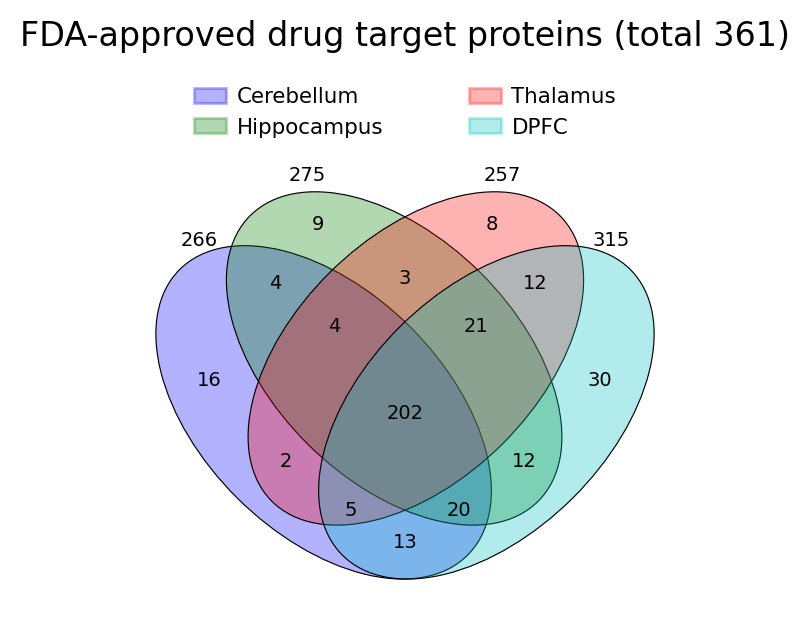

In [34]:
from venny4py.venny4py import venny4py

# Convert all gene lists to sets first
cerebellum_genes_set = set(cerebellum_genes)
hippocampus_genes_set = set(hippocampus_genes)
thalamus_genes_set = set(thalamus_genes)
dpfc_genes_set = set(dpfc_genes)

common_genes_sorted_DBP_set = set(common_genes_sorted_DBP)

cerebellum_common = cerebellum_genes_set & common_genes_sorted_DBP_set
hippocampus_common = hippocampus_genes_set & common_genes_sorted_DBP_set
thalamus_common = thalamus_genes_set & common_genes_sorted_DBP_set
dpfc_common = dpfc_genes_set & common_genes_sorted_DBP_set


# Prepare your gene sets as dictionaries
sets = {
    'Cerebellum': set(cerebellum_common),
    'Hippocampus': set(hippocampus_common),
    'Thalamus': set(thalamus_common),
    'DPFC': set(dpfc_common)
}



# Create and display the Venn diagram
venny4py(sets)
plt.title('FDA-approved drug target proteins (total 361)')
plt.show()



In [35]:
common_all_regions = cerebellum_common & hippocampus_common & thalamus_common & dpfc_common

print("Genes common to all four regions (total: {}):".format(len(common_all_regions)))
print(sorted(common_all_regions))


Genes common to all four regions (total: 202):
['A2M', 'ABAT', 'ACAD8', 'ACADM', 'ACADS', 'ACAT1', 'ACOX1', 'ADCY1', 'ADRA2A', 'AIFM1', 'ALAD', 'ALB', 'ALDH2', 'ALDH3A2', 'ANXA1', 'APP', 'ATIC', 'ATOX1', 'ATP1A1', 'ATP1A2', 'ATP1A3', 'ATP1B1', 'ATP1B2', 'ATP1B3', 'ATP2C1', 'ATP6V1A', 'ATP6V1C1', 'BRAF', 'C3', 'CA1', 'CA2', 'CACNA1A', 'CACNA1B', 'CACNA2D1', 'CACNB4', 'CACNG2', 'CADPS', 'CADPS2', 'CALB2', 'CALM2', 'CALR', 'CAMK2G', 'CANX', 'CAPS', 'CASP3', 'CAT', 'CD38', 'CHP1', 'CMPK1', 'COX4I1', 'COX5A', 'COX5B', 'COX6B1', 'COX6C', 'COX7B', 'COX7C', 'COX8A', 'CPNE1', 'CPT1A', 'CRBN', 'CRYZ', 'CYB5A', 'CYB5R1', 'CYB5R3', 'DDAH1', 'DDR1', 'DLD', 'DLG4', 'DMD', 'DPYSL2', 'EGFR', 'EGLN1', 'ETFDH', 'F3', 'FABP5', 'FDPS', 'FDXR', 'FECH', 'FGA', 'FGB', 'FGF1', 'FGG', 'FN1', 'FTH1', 'FTL', 'GABBR1', 'GABBR2', 'GABRA1', 'GABRB2', 'GABRG2', 'GANAB', 'GCDH', 'GOT1', 'GPD1', 'GRB2', 'GRIA2', 'GRIA3', 'GRIN1', 'GRIN2B', 'GSK3B', 'GSR', 'GSTP1', 'GUCY1A2', 'HBA1', 'HBB', 'HDAC2', 'HLA-A', 'HLA-B', '

In [39]:
cerebellum_df.head()

,Accession,Gene,22week_Avg,26week_Avg,1year_Avg,2year_Avg,4year_Avg,22year_Avg,35year_Avg,47year_Avg,82year_Avg
0,194595509,SPTAN1,3.403840e+07,3.919413e+07,9.294157e+07,8.739405e+07,9.942501e+07,9.608898e+07,7.419488e+07,7.729604e+07,7.943433e+07
1,306966132,SPTAN1,4.195606e+04,3.812966e+04,5.112267e+04,4.313739e+04,5.185106e+04,4.920949e+04,6.345708e+04,7.081324e+04,5.019671e+04
2,112382250,SPTBN1,2.644566e+07,2.713649e+07,5.056949e+07,5.641060e+07,6.209550e+07,5.938049e+07,5.729526e+07,5.229569e+07,5.309978e+07
3,41322908,PLEC,1.892782e+07,2.540079e+07,1.675443e+07,2.700018e+07,1.748658e+07,1.521510e+07,1.948687e+07,1.621112e+07,2.069531e+07
4,33350932,DYNC1H1,3.015181e+07,2.807374e+07,2.422420e+07,2.308685e+07,2.432593e+07,2.452676e+07,2.516773e+07,2.275261e+07,2.011240e+07


In [43]:
#now we do the hierarchical clustering from the data

from google.colab import files
uploaded = files.upload()

cerebellum_df_rep = pd.read_csv('cerebellum_DP_rep.csv')
hippocampus_df_rep = pd.read_csv('hippocampus_DP_rep.csv')
thalamus_df_rep = pd.read_csv('thalamus_DP_rep.csv')
dpfc_df_rep = pd.read_csv('DPFC_DP_rep.csv')

# Drop the 'AdjustedPvalue' column as requested
cerebellum_df_rep = cerebellum_df_rep.drop('AdjustedPvalue', axis=1, errors='ignore')
hippocampus_df_rep = hippocampus_df_rep.drop('AdjustedPvalue', axis=1, errors='ignore')
thalamus_df_rep = thalamus_df_rep.drop('AdjustedPvalue', axis=1, errors='ignore')
dpfc_df_rep = dpfc_df_rep.drop('AdjustedPvalue', axis=1, errors='ignore')


Saving thalamus_DP_rep.csv to thalamus_DP_rep (2).csv
Saving cerebellum_DP_rep.csv to cerebellum_DP_rep (1).csv
Saving DPFC_DP_rep.csv to DPFC_DP_rep (2).csv
Saving hippocampus_DP_rep.csv to hippocampus_DP_rep (2).csv


In [69]:
#now we do the hierarchical clustering from the data

from google.colab import files
uploaded = files.upload()

cerebellum_df_rep = pd.read_csv('cerebellum_DP_rep.csv')
hippocampus_df_rep = pd.read_csv('hippocampus_DP_rep.csv')
thalamus_df_rep = pd.read_csv('thalamus_DP_rep.csv')
dpfc_df_rep = pd.read_csv('DPFC_DP_rep.csv')




Saving thalamus_DP_rep.csv to thalamus_DP_rep (3).csv
Saving cerebellum_DP_rep.csv to cerebellum_DP_rep (2).csv
Saving DPFC_DP_rep.csv to DPFC_DP_rep (3).csv
Saving hippocampus_DP_rep.csv to hippocampus_DP_rep (3).csv


In [70]:
print(cerebellum_df_rep.head())

   Accession     Gene     22week_R1     22week_R2     22week_R3     26week_R1  \
0  194595509   SPTAN1  3.158007e+07  3.336885e+07  3.716629e+07  3.696728e+07   
1  306966132   SPTAN1  4.540570e+04  4.342574e+04  3.703673e+04  3.114526e+04   
2  112382250   SPTBN1  2.498305e+07  2.723436e+07  2.711956e+07  2.644556e+07   
3   41322908     PLEC  1.885042e+07  1.894975e+07  1.898329e+07  2.480390e+07   
4   33350932  DYNC1H1  3.074940e+07  2.977514e+07  2.993088e+07  2.768347e+07   

      26week_R2     26week_R3      1year_R1      1year_R2  ...     35year_R1  \
0  3.883568e+07  4.177942e+07  9.078634e+07  9.067239e+07  ...  8.185238e+07   
1  3.850719e+04  4.473653e+04  4.908522e+04  4.849056e+04  ...  5.700527e+04   
2  2.724561e+07  2.771830e+07  4.666846e+07  4.968081e+07  ...  5.242603e+07   
3  2.618532e+07  2.521314e+07  1.702979e+07  1.666496e+07  ...  1.997087e+07   
4  2.978380e+07  2.675395e+07  2.447606e+07  2.434708e+07  ...  2.550163e+07   

      35year_R2     35year_R3   

In [72]:
filtered_cerebellum_df = cerebellum_df_rep[cerebellum_df_rep['Gene'].isin(cerebellum_common)]
filtered_hippocampus_df = hippocampus_df_rep[hippocampus_df_rep['Gene'].isin(hippocampus_common)]
filtered_thalamus_df = thalamus_df_rep[thalamus_df_rep['Gene'].isin(thalamus_common)]
filtered_dpfc_df = dpfc_df_rep[dpfc_df_rep['Gene'].isin(dpfc_common)]

print(len(filtered_cerebellum_df))
print(len(filtered_hippocampus_df))
print(len(filtered_thalamus_df))
print(len(filtered_dpfc_df))


270
280
260
319


In [73]:
filtered_hippocampus_df.head()

,Accession,Gene,22week_R1,22week_R2,22week_R3,26week_R1,26week_R2,26week_R3,1year_R1,1year_R2,...,35year_R1,35year_R2,35year_R3,47year_R1,47year_R2,47year_R3,82year_R1,82year_R2,82year_R3,AdjustedPvalue
13,1004007314,JAK1,-2.253899e+02,4.157243e+02,3.900117e+02,4.154234e+02,3.555475e+02,3.558850e+02,2.305511e+02,3.548128e+02,...,5.752653e+02,3.716397e+02,3.718559e+02,3.856917e+02,3.577887e+02,3.571580e+02,1.302003e+03,5.017195e+02,5.271118e+02,1.000000e+00
29,104487006,PTPRS,1.121379e+05,9.655195e+04,9.223906e+04,1.128004e+05,1.066487e+05,1.025352e+05,7.625506e+04,9.092260e+04,...,8.373329e+04,8.005597e+04,7.452987e+04,7.734741e+04,7.110351e+04,8.042494e+04,5.717805e+04,6.475714e+04,5.565003e+04,2.659485e-02
36,10716563,CANX,4.047403e+06,4.352669e+06,4.578403e+06,3.696889e+06,3.703931e+06,3.927577e+06,2.506511e+06,2.519820e+06,...,2.488419e+06,2.501744e+06,2.449046e+06,2.837605e+06,2.696962e+06,2.669757e+06,2.594290e+06,2.518105e+06,2.658039e+06,9.440000e-10
49,10863913,SLC8A1,1.815640e+05,1.715999e+05,2.067148e+05,3.795679e+05,3.872347e+05,3.825548e+05,4.810545e+05,5.393796e+05,...,5.135580e+05,5.167225e+05,4.921969e+05,4.634567e+05,4.255558e+05,4.276974e+05,3.551074e+05,3.549141e+05,3.803293e+05,1.720000e-10
99,11038637,GRIN1,1.322511e+05,8.492960e+04,1.037248e+05,2.041051e+05,1.668136e+05,2.459363e+05,3.792651e+05,4.091237e+05,...,6.365256e+05,6.306605e+05,5.683787e+05,3.193624e+05,3.551951e+05,3.343132e+05,3.516815e+05,3.828560e+05,3.599433e+05,7.170000e-11


In [74]:
filtered_cerebellum_df.to_csv("filtered_cerebellum_drugtarget_genes.csv", index=False)
filtered_hippocampus_df.to_csv("filtered_hippocampus_drugtarget_genes.csv", index=False)
filtered_thalamus_df.to_csv("filtered_thalamus_drugtarget_genes.csv", index=False)
filtered_dpfc_df.to_csv("filtered_dpfc_drugtarget_genes.csv", index=False)

In [76]:
from google.colab import files
uploaded = files.upload()

cerebellum_df = pd.read_csv('cerebellum_DP.csv')
hippocampus_df = pd.read_csv('Hippocampus_DP.csv')
thalamus_df = pd.read_csv('Thallamus_DP.csv')
dpfc_df = pd.read_csv('DPFC_DP.csv')

filtered_cerebellum_df = cerebellum_df[cerebellum_df['Gene'].isin(cerebellum_common)]
filtered_hippocampus_df = hippocampus_df[hippocampus_df['Gene'].isin(hippocampus_common)]
filtered_thalamus_df = thalamus_df[thalamus_df['Gene'].isin(thalamus_common)]
filtered_dpfc_df = dpfc_df[dpfc_df['Gene'].isin(dpfc_common)]

print(len(filtered_cerebellum_df))
print(len(filtered_hippocampus_df))
print(len(filtered_thalamus_df))
print(len(filtered_dpfc_df))

filtered_cerebellum_df.to_csv("filtered_cerebellum_drugtarget_genes_avg.csv", index=False)
filtered_hippocampus_df.to_csv("filtered_hippocampus_drugtarget_genes_avg.csv", index=False)
filtered_thalamus_df.to_csv("filtered_thalamus_drugtarget_genes_avg.csv", index=False)
filtered_dpfc_df.to_csv("filtered_dpfc_drugtarget_genes_avg.csv", index=False)


Saving Thallamus_DP.csv to Thallamus_DP (1).csv
Saving cerebellum_DP.csv to cerebellum_DP (1).csv
Saving DPFC_DP.csv to DPFC_DP (1).csv
Saving Hippocampus_DP.csv to Hippocampus_DP (1).csv
270
280
260
319
